<a href="https://colab.research.google.com/github/patsaris/mypage/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from google.colab import files
 
 
uploaded = files.upload()


import tensorflow as tf
import io

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Saving training.csv to training.csv


In [ ]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Scenes")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

In [ ]:
CSV_COLUMN_NAMES = ['Time', 'Bedroom', 'Kitchen', 'LivingRoom', 'CoffeeMachine', 'Stove', 'Blinds', 'Scene']
SCENES = ['Unknown', 'WakingUp', 'Out', 'DinnerTime', 'Sleeping']

In [ ]:
train = pd.read_csv(io.BytesIO(uploaded['training.csv']), names=CSV_COLUMN_NAMES, index_col='Time')

In [ ]:
train = train.fillna(0)
train['Scene'] = train['Scene'].astype(int)
train_y = train.pop('Scene')
train

,Bedroom,Kitchen,LivingRoom,CoffeeMachine,Stove,Blinds
Time,,,,,,
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
19,1,1,1,0,0,0
20,1,1,1,0,1,0
21,1,1,1,0,1,0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

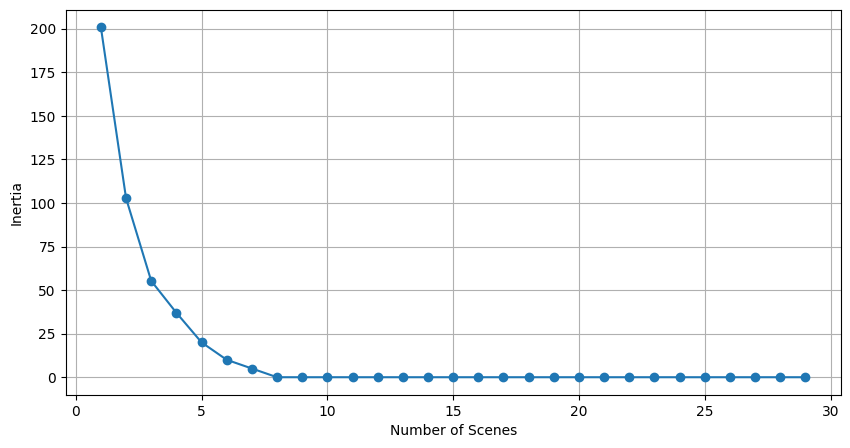

In [ ]:
optimise_k_means(train, 30)

In [ ]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=8)

# Fit the model to our dataset
kmeans.fit(train)

# Assign the data back to the workingdf
train['KMeans'] = kmeans.labels_
train.to_excel("output.xlsx",
             sheet_name='Sheet_name_1') 
from google.colab import files
files.download('output.xlsx')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>